**Import libraries**

In [455]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [456]:
import warnings
warnings.filterwarnings('ignore')

**Import dataset**

In [457]:
df=pd.read_csv('/car_evaluation.txt',header=None,sep=',',names=['buying','maint','doors','persons','lug_boot','safety','class'])

In [458]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [460]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [461]:
col=['buying','maint','doors','persons','lug_boot','safety','class']

In [462]:
for i in col:
  print(df[i].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


**Missing data**

In [463]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [464]:
x=df.iloc[:,:6]

In [465]:
y=df.iloc[:,6:]

**Splitting dataset**

In [466]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [467]:
x_train.shape,x_test.shape

((1382, 6), (346, 6))

**Encoding categorical variables**

In [468]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,vhigh,vhigh,5more,more,big,high
901,med,vhigh,3,4,small,med
1709,low,low,5more,2,big,high
706,high,med,4,2,med,med
678,high,med,3,2,med,low


In [469]:
import category_encoders as ce

In [470]:

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


x_train = encoder.fit_transform(x_train)

x_test = encoder.transform(x_test)

**Decision Tree Classification**

In [471]:
from sklearn.tree import DecisionTreeClassifier


In [472]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)

In [473]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [474]:
y_pred=dtree.predict(x_test)

In [475]:
from sklearn.metrics import accuracy_score

In [476]:
accuracy_score(y_test,y_pred)

0.8901734104046243

In [477]:
y_pred

array(['unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'acc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc',
       'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc',
       'acc', 'acc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'acc'

In [480]:
dtree.score(x_test,y_test)

0.8901734104046243

In [479]:
dtree.score(x_train, y_train)

0.85383502170767

In [478]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 83,   0,   0,   0],
       [ 11,   0,   0,   0],
       [ 10,   0, 225,   0],
       [ 17,   0,   0,   0]])

[Text(0.5769230769230769, 0.9166666666666666, 'X[5] <= 2.5\ngini = 0.452\nsamples = 1382\nvalue = [301, 58, 975, 48]'),
 Text(0.5, 0.75, 'X[3] <= 2.5\ngini = 0.577\nsamples = 913\nvalue = [301, 58, 506, 48]'),
 Text(0.4230769230769231, 0.5833333333333334, 'X[1] <= 1.5\ngini = 0.631\nsamples = 615\nvalue = [301, 58, 208, 48]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[0] <= 1.5\ngini = 0.462\nsamples = 149\nvalue = [54, 0, 95, 0]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37, 0]'),
 Text(0.23076923076923078, 0.25, 'X[0] <= 3.5\ngini = 0.499\nsamples = 112\nvalue = [54, 0, 58, 0]'),
 Text(0.15384615384615385, 0.08333333333333333, 'gini = 0.411\nsamples = 76\nvalue = [54, 0, 22, 0]'),
 Text(0.3076923076923077, 0.08333333333333333, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 36, 0]'),
 Text(0.6923076923076923, 0.4166666666666667, 'X[0] <= 1.5\ngini = 0.634\nsamples = 466\nvalue = [247, 58, 113, 48]'),
 Text(0.5384615384615384, 0.25, 'X[1] <= 3.5\ng

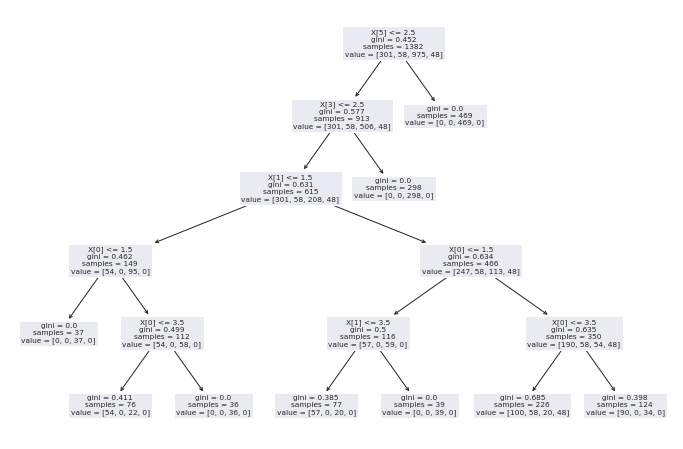

In [481]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(dtree.fit(x_train, y_train))

**Accuracy of test data in Decision Tree is 89%**